## Notes

#### What I'm Asking

- How does the victim's relationship to their murderer vary from state to state?
- How does it vary from region to region? MAYBE FOCUS ON REGION INSTEAD OF STATE?
- Compare relationship of murder to relationship status (census?)

#### Data to Find

- Find victim RELATIONSHIP data by STATE
- Compare to victim GENDER and AGE
- Dataframe of the max and min states for some of the data

#### Charts to Create

- Heat maps?
- Bar chart:
    - X-axis = state
    - Y-axis = number of that type
    - Colors = each relationship

#### Questions

- How many years? Just pick one?
- Select a handful of relationships? Do all? Edit them down to create broader categories?

#### Relationship Types
- Acquaintance
- Babysittee
- Boyfriend/girlfriend
- Child of boyfriend/girlfriend
- Child
- Common law spouse
- Employee
- Employer
- Friend
- Grandchild
- Grandparent
- Homosexual relationship
- In-law
- Neighbor
- Other family member
- Otherwise known
- Parent
- Relationship unknown
- Sibling
- Stepchild
- Spouse
- Stepparent
- Stepsibling
- Stranger
- Offender
- Ex-spouse

## Caveats

1. Not all states contributed full data for all years (ie some states might have started submitting data in later years; some states only had a handful of agencies that reported).
2. This is just looking at number of murders; not rates compared to the population of the states because of caveat 1.

## Set Up

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

# Import DATA.GOV API key
from api_keys import km_dg_key

# Output File (CSV)
output_data_file = "output_data/fbi_crime_data_state.csv"

## Get state abbreviations

In [3]:
#Pull all pages for the data for each state 
state_qry = "https://api.usa.gov/crime/fbi/sapi/api/states?api_key=" + km_dg_key 
state_results_1 = requests.get(state_qry, params={'page':0}).json()
state_results_2 = requests.get(state_qry, params={'page':1}).json()
state_results_3 = requests.get(state_qry, params={'page':2}).json()

#Make DFs for each page of data
sr1_df = pd.DataFrame(state_results_1['results'])
sr2_df = pd.DataFrame(state_results_2['results'])
sr3_df = pd.DataFrame(state_results_3['results'])

#Combine DFs of each page into one DF for all data
state_data = pd.concat([sr1_df, sr2_df, sr3_df])
state_data.head()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


## Get victim relationship data (relDF_base)

In [32]:
#This is the same series created before
states = (state_data.iloc[:,1]).astype(str)

#Open an empty list to initialize a dataframe
empty_list = []

relDF_base = pd.DataFrame(empty_list)

#Creating columns on list based on the returned data for one state
relDF_base["State"] = ""
relDF_base["Year"] = ""
relDF_base["Acquaintance"] = ""
relDF_base["Babysittee"] = ""
relDF_base["Boyfriend or Girlfriend"] = ""
relDF_base["Child of Boyfriend or Girlfriend"] = ""
relDF_base["Child"] = ""
relDF_base["Common Law Spouse"] = ""
relDF_base["Employee"] = ""
relDF_base["Employer"] = ""
relDF_base["Friend"] = ""
relDF_base["Grandchild"] = ""
relDF_base["Grandparent"] = ""
relDF_base["Homosexual Relationship"] = ""
relDF_base["In-Law"] = ""
relDF_base["Neighbor"] = ""
relDF_base["Other Family Member"] = ""
relDF_base["Otherwise Known"] = ""
relDF_base["Parent"] = ""
relDF_base["Unknown"] = ""
relDF_base["Sibling"] = ""
relDF_base["Stepchild"] = ""
relDF_base["Spouse"] = ""
relDF_base["Stepparent"] = ""
relDF_base["Stepsibling"] = ""
relDF_base["Stranger"] = ""
relDF_base["Offender"] = ""
relDF_base["Ex-Spouse"] = ""

#Loop through data to create the dataframe

for i in states:
    
    state = i 
    
    rel_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/states/"+ state +"/relationship?api_key=" + km_dg_key
    rel_response_state = requests.get(rel_query_url).json()
    
    for i in rel_response_state['results']:
        
        relDF_base = relDF_base.append({'State': state, 
                          'Year': i['data_year'], 
                          'Acquaintance': i['acquaintance'],
                          'Babysittee' : i['babysittee'],
                          'Boyfriend or Girlfriend' : i['boyfriend_girlfriend'],
                          'Child of Boyfriend or Girlfriend' : i['child_boyfriend_girlfriend'],
                          'Child' : i['child'],
                          'Common Law Spouse' : i['common_law_spouse'],
                          'Employee' : i['employee'],
                          'Employer' : i['employer'],
                          'Friend' : i['friend'],
                          'Grandchild' : i['grandchild'],
                          'Grandparent' : i['grandparent'],
                          'Homosexual Relationship' : i['homosexual_relationship'],
                          'In-Law' : i['in_law'],
                          'Neighbor' : i['neighbor'],
                          'Other Family Member' : i['other_family_member'],
                          'Otherwise Known' : i['otherwise_known'],
                          'Parent' : i['parent'],
                          'Unknown' : i['relationship_unknown'],
                          'Sibling' : i['sibling'],
                          'Stepchild' : i['stepchild'],
                          'Spouse' : i['spouse'],
                          'Stepparent' : i['stepparent'],
                          'Stepsibling' : i['stepsibling'],
                          'Stranger' : i['stranger'],
                          'Offender' : i['offender'],
                          'Ex-Spouse' : i['ex_spouse'],
                             },
                          ignore_index = True)

relDF_base.head()

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,1991,136,0,48,0,9,4,3,0,...,7,86,6,0,38,2,0,179,0,6
1,AL,1992,76,0,17,0,7,5,0,0,...,3,126,4,1,20,1,0,45,0,4
2,AL,2006,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
3,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


## Filter years to 2007-2017

In [164]:
#Change to numeric
relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF_base["Acquaintance"] = pd.to_numeric(relDF_base["Acquaintance"])
relDF_base["Babysittee"] = pd.to_numeric(relDF_base["Babysittee"])
relDF_base["Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Boyfriend or Girlfriend"])
relDF_base["Child of Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Child of Boyfriend or Girlfriend"])
relDF_base["Child"] = pd.to_numeric(relDF_base["Child"])
relDF_base["Common Law Spouse"] = pd.to_numeric(relDF_base["Common Law Spouse"])
relDF_base["Employee"] = pd.to_numeric(relDF_base["Employee"])
relDF_base["Employer"] = pd.to_numeric(relDF_base["Employer"])
relDF_base["Friend"] = pd.to_numeric(relDF_base["Friend"])
relDF_base["Grandchild"] = pd.to_numeric(relDF_base["Grandchild"])
relDF_base["Grandparent"] = pd.to_numeric(relDF_base["Grandparent"])
relDF_base["Homosexual Relationship"] = pd.to_numeric(relDF_base["Homosexual Relationship"])
relDF_base["In-Law"] = pd.to_numeric(relDF_base["In-Law"])
relDF_base["Neighbor"] = pd.to_numeric(relDF_base["Neighbor"])
relDF_base["Other Family Member"] = pd.to_numeric(relDF_base["Other Family Member"])
relDF_base["Otherwise Known"] = pd.to_numeric(relDF_base["Otherwise Known"])
relDF_base["Parent"] = pd.to_numeric(relDF_base["Parent"])
relDF_base["Unknown"] = pd.to_numeric(relDF_base["Unknown"])
relDF_base["Sibling"] = pd.to_numeric(relDF_base["Sibling"])
relDF_base["Stepchild"] = pd.to_numeric(relDF_base["Stepchild"])
relDF_base["Spouse"] = pd.to_numeric(relDF_base["Spouse"])
relDF_base["Stepparent"] = pd.to_numeric(relDF_base["Stepparent"])
relDF_base["Stepsibling"] = pd.to_numeric(relDF_base["Stepsibling"])
relDF_base["Stranger"] = pd.to_numeric(relDF_base["Stranger"])
relDF_base["Offender"] = pd.to_numeric(relDF_base["Offender"])
relDF_base["Ex-Spouse"] = pd.to_numeric(relDF_base["Ex-Spouse"])

#Filter to years 2007-2017 - ORIGINAL
##relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF = relDF_base.loc[(relDF_base["Year"] >= 2007) & (relDF_base["Year"] <= 2017), :]

#Reset the index
relDF = relDF.reset_index()
relDF = relDF.drop(axis=1, columns=["index"])
    
#Check dataframe:
relDF.head(10)

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,AL,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,AL,2013,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AL,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,AL,2015,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,AL,2016,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
8,AL,2017,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,AR,2007,22,0,6,0,1,0,0,0,...,3,62,4,0,7,1,0,13,0,0


## Drop State and Year and Convert All Columns to Integers (relOnlyDF)

In [165]:
#Pull out the State and Year columns to put back into the dataframe later
State = relDF["State"]
Year = relDF["Year"]

#Drop the columns that are not wanted while finding Max 
relOnlyDF = relDF.drop(axis=1, columns=["State", "Year"])

relOnlyDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Find Max Value & ID Column for Each State/Year (relMaxAllRowsDF)

In [137]:
#You can do the searches for ID and Max separately because they will be in the same order/use the same index for 
#combining later.

#Find the column label that corresponds to the column with the max value for that row
relSeriesID = relOnlyDF.idxmax(axis=1, skipna=True)

#Find the max value for each row
relSeriesMax = relOnlyDF.max(axis=1, skipna=True)

#Combine state, year, and maximum columns into a new DF
relMaxAllRowsDFSetup = pd.DataFrame([State, Year, relSeriesID, relSeriesMax]).T

#Rename columns
relMaxAllRowsDF = relMaxAllRowsDFSetup.rename(columns = {"Unnamed 0": "Relationship",
                                                         "Unnamed 1": "Number of Murders"})

relMaxAllRowsDF.head()

,State,Year,Relationship,Number of Murders
0,AL,2008,Stranger,2
1,AL,2009,Boyfriend or Girlfriend,1
2,AL,2010,Otherwise Known,3
3,AL,2012,Otherwise Known,1
4,AL,2013,Acquaintance,1


## Max Values Excluding Unknown (relMaxNoUnknownDF)

In [166]:
#Reset relOnlyDF, dropping the Unknown column:
relOnlyDF = relDF.drop(axis=1, columns=["State", "Year", "Unknown"])

#Find the column label that corresponds to the column with the max value for that row
relSeriesID = relOnlyDF.idxmax(axis=1, skipna=True)

#Find the max value for each row
relSeriesMax = relOnlyDF.max(axis=1, skipna=True)

#Combine state, year, and maximum columns into a new DF
relMaxNoUnknownDFSetup = pd.DataFrame([State, Year, relSeriesID, relSeriesMax]).T

#Rename columns
relMaxNoUnknownDF = relMaxNoUnknownDFSetup.rename(columns = {"Unnamed 0": "Relationship",
                                                             "Unnamed 1": "Number of Murders"})

relMaxNoUnknownDF.head()

,State,Year,Relationship,Number of Murders
0,AL,2008,Stranger,2
1,AL,2009,Boyfriend or Girlfriend,1
2,AL,2010,Otherwise Known,3
3,AL,2012,Otherwise Known,1
4,AL,2013,Acquaintance,1


***
***

<font color=red>

# For 2017: Map with dots; each relationship is a different color; each dot is a different size based on number of murders

***
***

## Stacked Bar Chart 
- Sum of values of each column for each state
- Find percentage of each column for sum of row
- X-axis = state
- Y-axis = percentage of murders
- Stack = each type of relationship

#### Grouped By State, Sum Years for Each State, Add Total Column

In [215]:
#Group by state:
grouprelDFState = relDF.groupby(["State"]).sum()

#Drop year:
relStatePercDF = grouprelDFState.drop(axis=1, columns=["Year"])

col_list= list(relStatePercDF)
col_list

relStatePercDF['Total Murders'] = relStatePercDF[col_list].sum(axis=1)
relStatePercDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse,Total Murders
State,,,,,,,,,,,,,,,,,,,,,
AL,4,0,2,0,1,0,0,0,0,0,...,2,1,0,1,0,0,7,0,0,24
AR,318,2,88,9,40,3,0,2,47,0,...,1434,23,5,79,7,1,120,10,7,2417
AZ,23,0,13,0,28,0,0,1,6,0,...,23,2,1,8,1,0,31,1,3,160
CO,376,7,101,13,100,10,2,4,67,3,...,766,17,13,118,8,0,366,10,14,2241
CT,129,4,39,4,23,3,2,0,20,3,...,132,4,2,26,0,0,108,6,3,612


#### Change DF to Percentages (relStatePercDF)

In [216]:
relStatePercDF["Acquaintance"] = (relStatePercDF["Acquaintance"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Babysittee"] = (relStatePercDF["Babysittee"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Boyfriend or Girlfriend"] = (relStatePercDF["Boyfriend or Girlfriend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Child of Boyfriend or Girlfriend"] = (relStatePercDF["Child of Boyfriend or Girlfriend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Child"] = (relStatePercDF["Child"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Common Law Spouse"] = (relStatePercDF["Common Law Spouse"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Employee"] = (relStatePercDF["Employee"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Employer"] = (relStatePercDF["Employer"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Friend"] = (relStatePercDF["Friend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Grandchild"] = (relStatePercDF["Grandchild"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Grandparent"] = (relStatePercDF["Grandparent"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Homosexual Relationship"] = (relStatePercDF["Homosexual Relationship"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["In-Law"] = (relStatePercDF["In-Law"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Neighbor"] = (relStatePercDF["Neighbor"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Other Family Member"] = (relStatePercDF["Other Family Member"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Otherwise Known"] = (relStatePercDF["Otherwise Known"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Parent"] = (relStatePercDF["Parent"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Unknown"] = (relStatePercDF["Unknown"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Sibling"] = (relStatePercDF["Sibling"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepchild"] = (relStatePercDF["Stepchild"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Spouse"] = (relStatePercDF["Spouse"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepparent"] = (relStatePercDF["Stepparent"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepsibling"] = (relStatePercDF["Stepsibling"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stranger"] = (relStatePercDF["Stranger"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Offender"] = (relStatePercDF["Offender"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Ex-Spouse"] = (relStatePercDF["Ex-Spouse"] / relStatePercDF["Total Murders"]) * 100

relStatePercDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse,Total Murders
State,,,,,,,,,,,,,,,,,,,,,
AL,16.666667,0.000000,8.333333,0.000000,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.333333,4.166667,0.000000,4.166667,0.000000,0.000000,29.166667,0.000000,0.000000,24
AR,13.156806,0.082747,3.640877,0.372362,1.654944,0.124121,0.000000,0.082747,1.944559,0.000000,...,59.329748,0.951593,0.206868,3.268515,0.289615,0.041374,4.964832,0.413736,0.289615,2417
AZ,14.375000,0.000000,8.125000,0.000000,17.500000,0.000000,0.000000,0.625000,3.750000,0.000000,...,14.375000,1.250000,0.625000,5.000000,0.625000,0.000000,19.375000,0.625000,1.875000,160
CO,16.778224,0.312361,4.506917,0.580098,4.462294,0.446229,0.089246,0.178492,2.989737,0.133869,...,34.181169,0.758590,0.580098,5.265506,0.356983,0.000000,16.331995,0.446229,0.624721,2241
CT,21.078431,0.653595,6.372549,0.653595,3.758170,0.490196,0.326797,0.000000,3.267974,0.490196,...,21.568627,0.653595,0.326797,4.248366,0.000000,0.000000,17.647059,0.980392,0.490196,612


#### Stacked Bar Chart

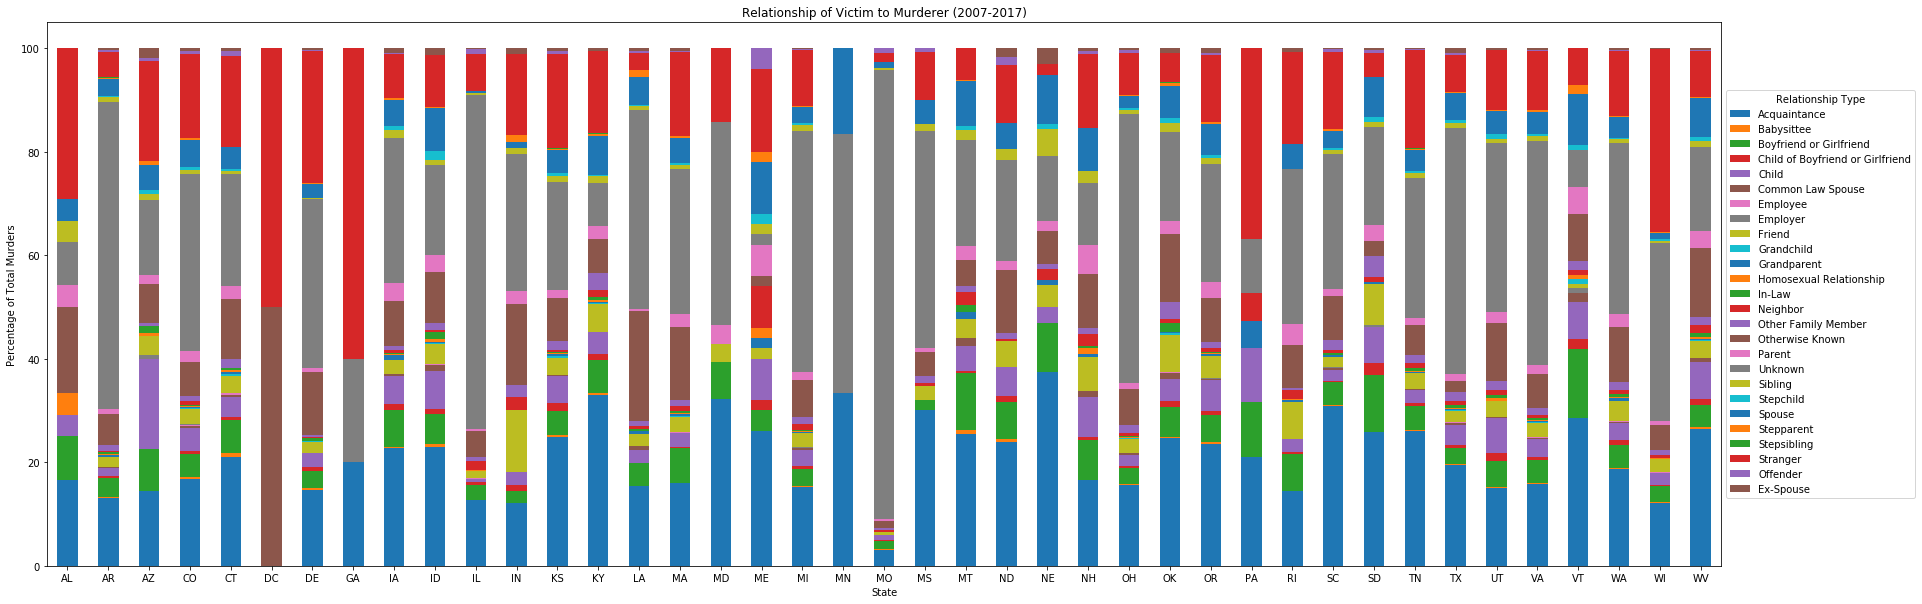

In [228]:
#relStatePercDF.groupby(["State", ""])
#- X-axis = state
#- Y-axis = percentage of murders
#- Stack = each type of relationship
relStatePercDFNoTotal = relStatePercDF.drop(axis=1, columns=["Total Murders"])

relStatePercDFNoTotal.plot(kind='bar',
                           stacked=True,
                           title="Relationship of Victim to Murderer (2007-2017)", 
                           figsize=(30,10),
                           rot=0
                           )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("State")
plt.ylabel("Percentage of Total Murders")

plt.savefig("Image_RelVictimToMurderAllYears.png")

In [142]:
#2017 max data
data2017 = relMaxNoUnknownDF.loc[relMaxNoUnknownDF["Year"] == 2017, :]
data2017.head()

,State,Year,Relationship,Number of Murders
8,AL,2017,Acquaintance,1
19,AR,2017,Acquaintance,33
30,AZ,2017,Stranger,15
41,CO,2017,Acquaintance,53
52,CT,2017,Acquaintance,13


In [37]:
#Grouped by state by year (DF)
grouped = relDF.groupby(["State", "Year"])
relgroupStateYear = grouped.sum()
relgroupStateYear

Acquaintance  Babysittee  Boyfriend or Girlfriend  \
State Year                                                      
AL    2008             1           0                        0   
      2009             0           0                        1   
      2010             0           0                        0   
      2012             0           0                        0   
      2013             1           0                        1   
      2014             0           0                        0   
      2015             1           0                        0   
      2016             0           0                        0   
      2017             1           0                        0   
AR    2007            22           0                        6   
      2008            12           0                        4   
      2009            56           0                        7   
      2010            21           0                        8   
      2011            19           0                        9   
      2012            40           1                        9   
      2013            28           0                        5   
      2014            22           0                        8   
      2015            36           0                       12   
      2016            29           0                       14   
      2017            33           1                        6   
AZ    2007             3           0                        0   
      2008             2           0                        1   
      2009             0           0                        1   
      2010             4           0                        1   
      2011             4           0                        2   
      2012             3           0                        4   
      2013             1           0                        1   
      2014             2           0                        1   
      2015             1           0                        0   
      2016             2           0                        1   
...                  ...         ...                      ...   
WA    2010            21           0                        3   
      2011            24           1                        5   
      2012            55           0                       11   
      2013            46           1                        9   
      2014            33           0                        8   
      2015            45           0                       11   
      2016            34           0                       12   
      2017            56           1                       17   
WI    2007            18           0                        6   
      2008            14           2                        4   
      2009            17           0                        4   
      2010            43           0                        7   
      2011            32           1                        8   
      2012            33           0                        3   
      2013            26           1                        6   
      2014            27           0                        9   
      2015            32           1                        7   
      2016            52           1                       18   
      2017            24           1                        6   
WV    2007             9           1                        4   
      2008            14           0                        5   
      2009            22           0                        6   
      2010            11           0                        2   
      2011            26           1                        6   
      2012            24           0                        4   
      2013            11           0                        2   
      2014            40           1                        2   
      2015            27           0                        3   
      2016            28           0           

In [38]:
#Grouped by year by state (DF)
grouped2 = relDF.groupby(["Year", "State"])
relgroupYearState = grouped2.sum()
relgroupYearState

Acquaintance  Babysittee  Boyfriend or Girlfriend  \
Year State                                                      
2007 AR               22           0                        6   
     AZ                3           0                        0   
     CO               29           1                       12   
     CT                8           0                        5   
     DE                4           0                        3   
     GA                0           0                        0   
     IA               15           1                        5   
     ID               23           0                        4   
     IL               10           0                        1   
     KS               21           0                        2   
     KY                3           0                        0   
     LA                8           0                        3   
     MA               17           0                       10   
     ME                3           0                        0   
     MI               93           1                       24   
     MT                3           0                        2   
     ND                5           0                        1   
     NE                6           0                        1   
     NH                0           0                        2   
     OH               72           1                       11   
     OR                6           0                        0   
     RI                2           0                        1   
     SC              183           4                       21   
     SD                1           0                        1   
     TN              142           1                       24   
     TX               41           0                       10   
     UT               23           0                        4   
     VA               54           0                       17   
     VT                7           0                        1   
     WA                2           0                        1   
...                  ...         ...                      ...   
2017 IN                2           0                        1   
     KS               42           0                        9   
     KY               93           1                       15   
     LA               16           0                        2   
     MA               20           0                        7   
     MD                9           0                        2   
     ME                1           0                        0   
     MI               60           1                       17   
     MN                2           0                        0   
     MO               11           0                        5   
     MS                9           0                        0   
     MT               15           1                        1   
     ND                3           0                        3   
     NE                4           0                        1   
     NH                4           0                        1   
     OH               98           1                       25   
     OK               18           0                        3   
     OR               20           0                        4   
     PA                0           0                        0   
     RI                5           0                        1   
     SC              160           0                       21   
     SD                8           0                        0   
     TN              163           0                       30   
     TX               59           2                        6   
     UT               14           0                        6   
     VA              101           1                       29   
     VT                2           0                        3   
     WA               56           1                       17   
     WI               24           1           

In [ ]:
Find Max